In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import plotly.express as px
from plotly.offline import iplot
import folium
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [305]:
df = pd.read_excel('zomato.xlsx')
df1=df
df1.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to d...","[Pasta, Lunch Buffet, Masala Papad, Paneer Laj...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for dinn...","[Momos, Lunch Buffet, Chocolate Nirvana, Thai ...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that g...","[Churros, Cannelloni, Minestrone Soup, Hot Cho...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper ...",[Masala Dosa],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant i...","[Panipuri, Gol Gappe]",Buffet,Banashankari


### I removed the columns "url", "phone", "reviews_list", "address", "menu_item", and "dish_liked" as they were not needed.

In [306]:
df1.drop(["url", "phone", "reviews_list", "address", "menu_item", "dish_liked"], axis = 1, inplace = True)
df1.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Renaming the column name

In [307]:
df1=df1.rename(columns={
    """name""":"""Name""",
    """online_order""":"""Online_Order""",
    """book_table""":"""Book_Table""",
    """rate""":"""Rate""",
    """votes""":"""Votes""",
    """location""":"""Location""",
    """rest_type""":"""Rest_Type""", 
    """cuisines""":"""Cuisines""", 
    """approx_cost(for two people)""":"""Cost_For_Two_People""",  
    """listed_in(type)""":"""Type""", 
    """listed_in(city)""":"""City"""})
df1.columns

Index(['Name', 'Online_Order', 'Book_Table', 'Rate', 'Votes', 'Location',
       'Rest_Type', 'Cuisines', 'Cost_For_Two_People', 'Type', 'City'],
      dtype='object')

### I am creating a function and applying it to the 'Name' column to remove the special characters from the column name.

In [308]:
def clean_name(nm):
    nm=str(nm)
    nm=nm.replace("Âs","'s").replace("Â¨","e").replace("»","u").replace("±", "").replace("ª","a").replace("¢","a").replace("Â°","°").replace("Â","").replace("Ã","").replace("", "").replace("","").replace("©", "e").replace(" ??","?").replace("?","'s").replace(" at...","").replace(" &...","").replace("@ ","@").replace("..","").title().replace("'S","'s").replace("'ss","'s").strip()
    return nm

In [309]:
df1["Name"]=df1["Name"].apply(clean_name)
df1['Name'].iloc[0:11]

0                                               Jalsa
1                                      Spice Elephant
2                                     San Churro Cafe
3                               Addhuri Udupi Bhojana
4                                       Grand Village
5                                     Timepass Dinner
6     Rosewood International Hotel - Bar & Restaurant
7                                              Onesta
8                                      Penthouse Cafe
9                                           Smacznego
10                                Cafe Down The Alley
Name: Name, dtype: object

In [310]:
df1['Name'].iloc[8263]

"3B's - Buddies, Bar & Barbecues"

### I found that the 'Rate' column is given in the object data type, so first I am finding the unique values and converting this column to the float data type.

In [311]:
df1['Rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### I am creating a function and applying it to the 'Rate' column to remove the values after the slash.

In [312]:
def clean_rate(val):
    if (val == "NEW" or val=="-"):
        return np.nan
    else:
        val=str(val).split("/")
        val=val[0]
        return float(val)

In [313]:
df1["Rate"]=df1["Rate"].apply(clean_rate)

In [314]:
df1['Rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: Rate, dtype: float64

### Find out the null values

In [315]:
df1.isnull().sum().sort_values(ascending = False)

Rate                   10052
Cost_For_Two_People      346
Rest_Type                227
Cuisines                  45
Location                  21
Name                       0
Online_Order               0
Book_Table                 0
Votes                      0
Type                       0
City                       0
dtype: int64

### I found a lot of null values in the columns 'Location', 'Rate', 'Rest_Type', 'Cuisines' and 'Cost_For_Two_People', so I decided to remove them.

In [316]:
df1.dropna(subset = ["Location", "Rate", "Rest_Type", "Cuisines", "Cost_For_Two_People"], inplace = True)

In [317]:
df1.isnull().sum().sort_values(ascending = False)

Name                   0
Online_Order           0
Book_Table             0
Rate                   0
Votes                  0
Location               0
Rest_Type              0
Cuisines               0
Cost_For_Two_People    0
Type                   0
City                   0
dtype: int64

### Drop the duplicate data

In [318]:
df1.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 41263 non-null  object 
 1   Online_Order         41263 non-null  object 
 2   Book_Table           41263 non-null  object 
 3   Rate                 41263 non-null  float64
 4   Votes                41263 non-null  int64  
 5   Location             41263 non-null  object 
 6   Rest_Type            41263 non-null  object 
 7   Cuisines             41263 non-null  object 
 8   Cost_For_Two_People  41263 non-null  float64
 9   Type                 41263 non-null  object 
 10  City                 41263 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.8+ MB


### City wise restaurant count

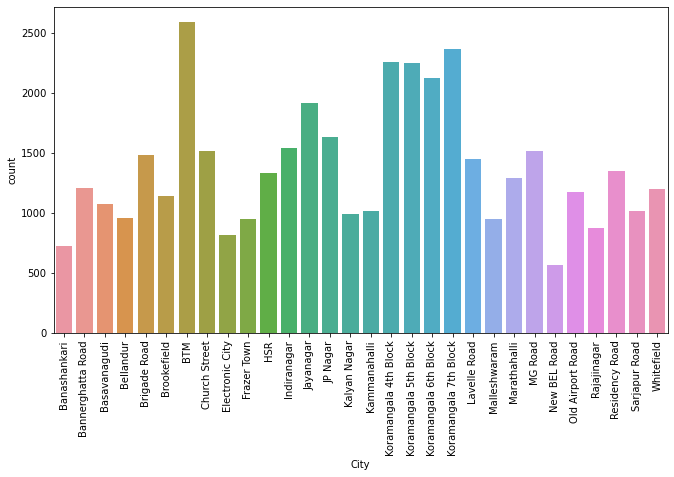

In [319]:
plt.figure(figsize=(11,6))
ax = sns.countplot(df1['City'])
plt.xticks(rotation=90)
plt.show()

### Restuarants type count

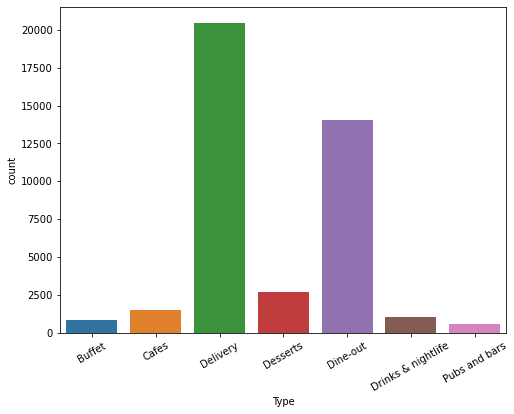

In [320]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df1['Type'])
plt.xticks(rotation=30)
plt.show()

### On the basis of rating Booking Table vs Online Order

<AxesSubplot:xlabel='Book_Table', ylabel='Rate'>

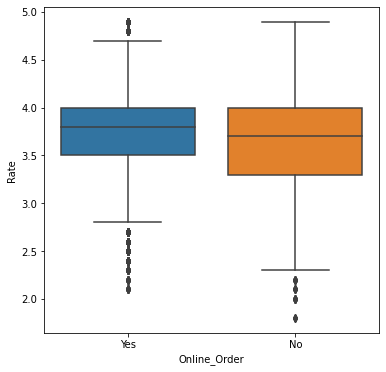

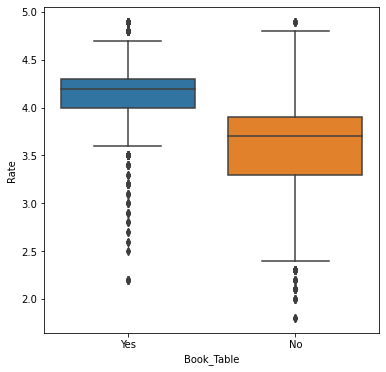

In [321]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Online_Order',y='Rate',data=df1)


plt.figure(figsize=(6,6))
sns.boxplot(x='Book_Table',y='Rate',data=df1)

### What relation does the rating and number of votes that a restaurant receives have?

<AxesSubplot:xlabel='Rate', ylabel='Votes'>

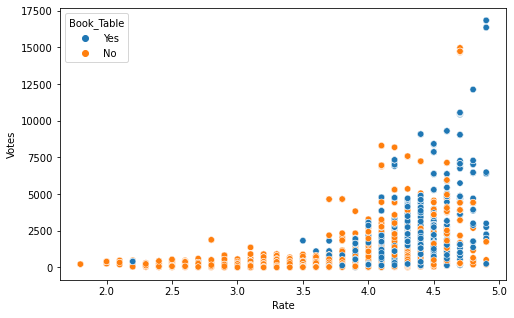

In [322]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = "Rate", y = "Votes", hue = "Book_Table", data = df1, s = 40)

### Table booking and online order facility percentage

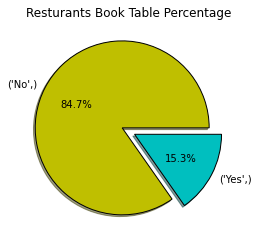

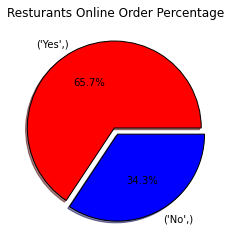

In [323]:
counts=df1[['Book_Table']].value_counts()
my_explode=[0.08,0.08]
plt.pie(counts, labels=counts.index, colors=['y','c'],  autopct='%1.1f%%',
        shadow=True,wedgeprops={'edgecolor':'k'},explode=my_explode)
plt.title('Resturants Book Table Percentage')
plt.show()

counts=df1[['Online_Order']].value_counts()
my_explode1=[0.04,0.04]
plt.pie(counts, labels=counts.index, colors=['r','b'], autopct='%1.1f%%', 
        shadow=True,wedgeprops={'edgecolor':'k'},explode=my_explode1)
plt.title('Resturants Online Order Percentage')
plt.show()

### Relation between rating and cost for two people

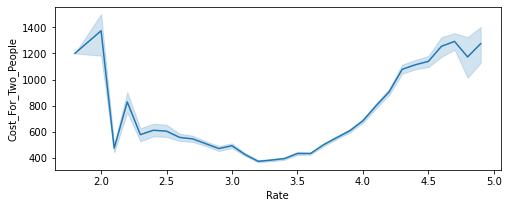

In [324]:
plt.figure(figsize = (8, 3))
sns.lineplot(x='Rate',y='Cost_For_Two_People',data=df1)
plt.show()

In [325]:
df1.columns

Index(['Name', 'Online_Order', 'Book_Table', 'Rate', 'Votes', 'Location',
       'Rest_Type', 'Cuisines', 'Cost_For_Two_People', 'Type', 'City'],
      dtype='object')

### Top 10 Restuarants by votes

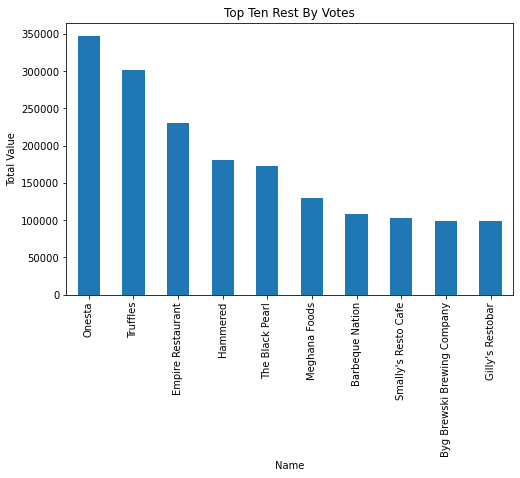

In [326]:
votes_totals = df1.groupby('Name')['Votes'].sum()
top_ten_rest=votes_totals.nlargest(10)

plt.figure(figsize = (8,5))
top_ten_rest.plot(kind='bar')
plt.xlabel('Name')
plt.ylabel('Total Value')
plt.title('Top Ten Rest By Votes')
plt.xticks(rotation=90)
plt.show()

### Lowest 10 Restuarants by Average Rating

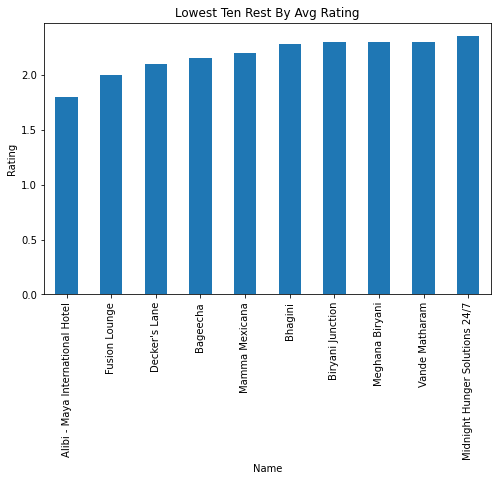

In [327]:
rate_totals = df1.groupby('Name')['Rate'].mean()
top_ten_rest=rate_totals.nsmallest(10)

plt.figure(figsize = (8,5))
top_ten_rest.plot(kind='bar')

plt.xlabel('Name')
plt.ylabel('Rating')
plt.title('Lowest Ten Rest By Avg Rating')
plt.xticks(rotation=90)
plt.show()

### Count of Hotels on Brigade Road Location

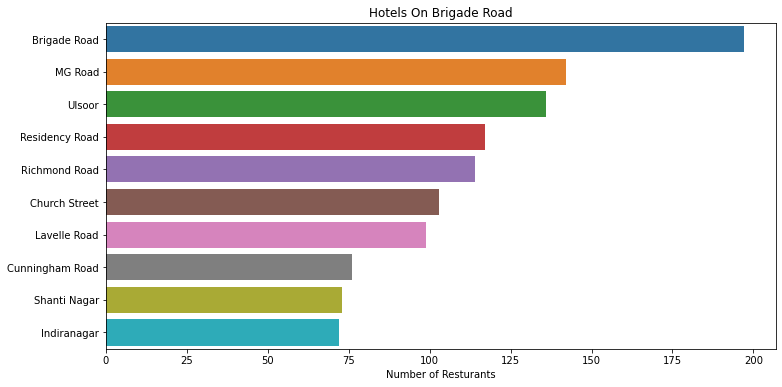

In [328]:
Brigade_Road = df1[(df1.City == 'Brigade Road')]
plt.figure(figsize=(12,6))
sns.barplot(x=Brigade_Road.Location.value_counts().head(10), y=Brigade_Road.Location.value_counts().head(10).index)

plt.ylabel(None)
plt.xlabel('Number of Resturants')
plt.title('Hotels On Brigade Road')
plt.show()

### Top 10 Category of Cuisines ratio

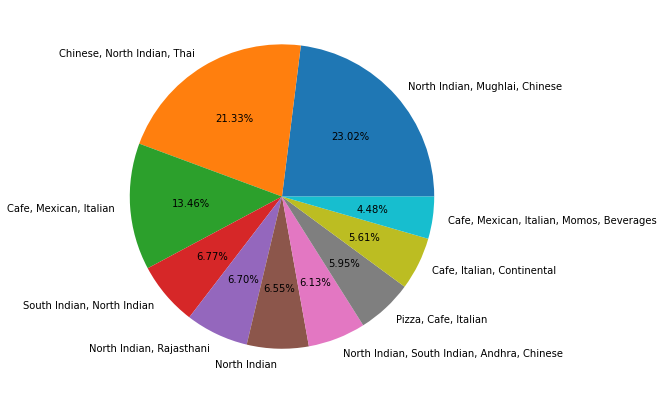

In [329]:
cusines_final=df1.Cuisines.value_counts()[:10]
plt.figure(figsize=(10,7))
plt.pie(cusines_final[:10], labels=df1.Cuisines[:10], autopct='%1.2f%%')
plt.show()

### Quick Bites has noticeably more Votes.

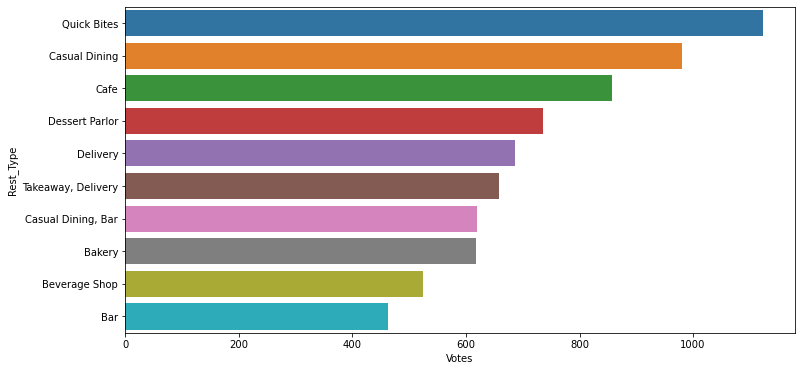

In [330]:
plt.figure(figsize=(12,6))
sns.barplot(x=df1.Votes.value_counts().head(10), y=df1.Rest_Type.value_counts().head(10).index)

plt.ylabel("Rest_Type")
plt.xlabel('Votes')
plt.show()

### I observed that on the basis of the below bar chart Cafe Coffee Day has more outlets in various locations.

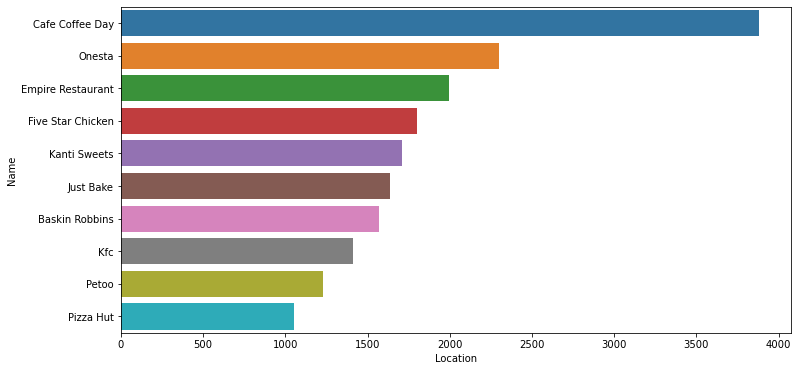

In [331]:
plt.figure(figsize=(12,6))
sns.barplot(x=df1.Location.value_counts().head(10), y=df1.Name.value_counts().head(10).index)

plt.xlabel("Location")
plt.ylabel("Name")
plt.show()

### The top 10 cities with the maximum number of restaurants

<AxesSubplot:xlabel='City'>

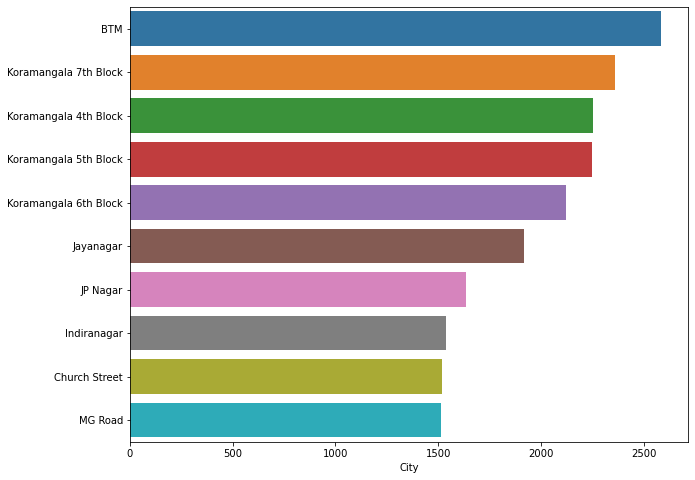

In [332]:
popular_city = df1["City"].value_counts().head(10)
popular_city
plt.figure(figsize = (10, 8))
sns.barplot(x = popular_city, y = popular_city.index)

### Relationship between Ratings and Number of Votes for Online Orders

<AxesSubplot:xlabel='Rate', ylabel='Votes'>

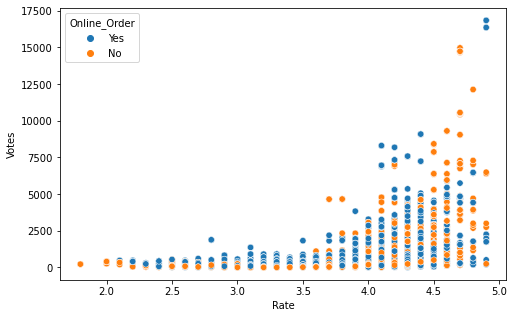

In [333]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = "Rate", y = "Votes", hue = "Online_Order", data = df1, s = 40)

### Corelation Heatmap

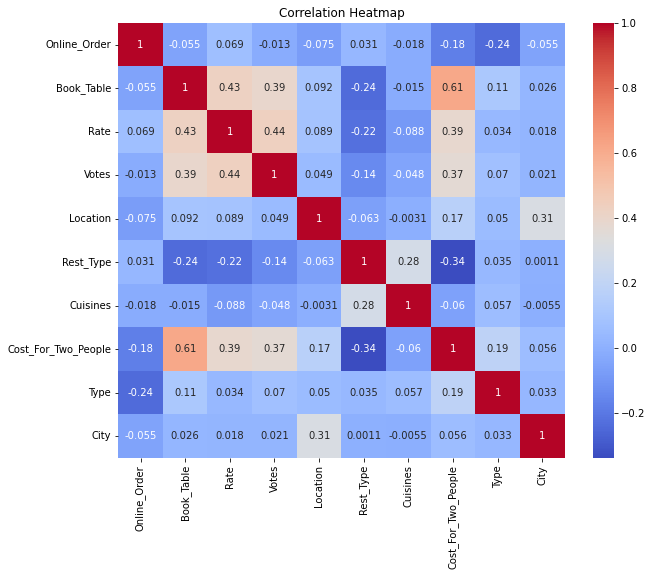

In [334]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

I have observed the below analysis from my end.

Online ordering has gained significant traction in Bangalore, with a considerable number of restaurants offering this service.

Restaurants in Bangalore span a wide range of price categories, catering to diverse customer preferences and budgets.

The analysis indicated a positive correlation between restaurant ratings and the number of reviews received. Higher-rated restaurants tend to have a higher number of reviews, indicating a potential relationship between customer satisfaction and popularity.

The insights obtained from this project can be utilized by various stakeholders, including restaurant owners, customers, and food enthusiasts, to make informed decisions and better understand the restaurant scene in Bangalore.
